In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to your zip file and extraction folder
zip_path = "/content/drive/MyDrive/archive.zip"  # Change this to your actual file path
extract_path = "/content/dataset"  # The folder where it will be extracted

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")


Extraction completed!


In [ ]:
# Install necessary libraries (Only for Google Colab)
!pip install torch torchvision timm matplotlib

# Import Required Libraries
import os
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import timm  # For Swin Transformer & ViT
import pandas as pd

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from collections import Counter
from PIL import Image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
df = pd.read_csv("/content/dataset/train.csv")
print(df.head())

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [ ]:
print(df['diagnosis'].value_counts())


diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64


In [ ]:
# Define the correct dataset path (Second gaussian_filtered_images/)
dataset_path = "/content/dataset/gaussian_filtered_images/gaussian_filtered_images/"

# Load dataset using ImageFolder (Now correctly detecting subfolders)
full_dataset = datasets.ImageFolder(root=dataset_path)

# Print class mappings (Folder names -> Labels)
print("Class-to-Index Mapping:", full_dataset.class_to_idx)


Class-to-Index Mapping: {'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [ ]:
from torch.utils.data import DataLoader, random_split

# Train-Validation Split (80% Train, 20% Validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print dataset sizes
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")


Train Dataset Size: 2929
Validation Dataset Size: 733


In [ ]:
from collections import Counter

# Count samples per class
train_class_counts = Counter([label for _, label in train_dataset])
val_class_counts = Counter([label for _, label in val_dataset])

print("Training Class Distribution:", train_class_counts)
print("Validation Class Distribution:", val_class_counts)


Training Class Distribution: Counter({2: 1442, 1: 798, 0: 297, 3: 236, 4: 156})
Validation Class Distribution: Counter({2: 363, 1: 201, 0: 73, 3: 59, 4: 37})


In [ ]:
# Install required libraries if not installed (for Google Colab)
!pip install torch torchvision timm matplotlib

# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import timm  # For Swin Transformer & ViT
import time
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from collections import Counter
from PIL import Image



In [ ]:
# Define dataset path (Ensure it points to the subfolders)
dataset_path = "/content/dataset/gaussian_filtered_images/gaussian_filtered_images/"

# Define transformations for Train & Validation
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=dataset_path)

# Train-Validation Split (80% Train, 20% Validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply transformations
train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform = val_transforms

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print dataset sizes
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")

# Print class mappings (Folder names -> Labels)
print("Class-to-Index Mapping:", full_dataset.class_to_idx)


Train Dataset Size: 2929
Validation Dataset Size: 733
Class-to-Index Mapping: {'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [ ]:
# Define Swin Transformer + ViT Hybrid Model
class HybridModel(nn.Module):
    def __init__(self, num_classes=5):  # 5 classes for DR classification
        super(HybridModel, self).__init__()
        self.swin = timm.create_model("swin_base_patch4_window7_224", pretrained=True, num_classes=num_classes)
        self.vit = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=num_classes)
        self.fc = nn.Linear(num_classes * 2, num_classes)  # Combining outputs

    def forward(self, x):
        swin_out = self.swin(x)
        vit_out = self.vit(x)
        combined = torch.cat((swin_out, vit_out), dim=1)
        output = self.fc(combined)
        return output

# Set device (Use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridModel(num_classes=5).to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
criterion = nn.CrossEntropyLoss()  # Multi-class classification loss
optimizer = optim.AdamW(model.parameters(), lr=1e-5)  # Lower learning rate to prevent overfitting


In [ ]:
def train_model(model, train_loader, val_loader, epochs=20):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    total_start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()
        model.train()
        train_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total
        train_losses.append(train_loss / len(train_loader))
        train_accs.append(train_acc)

        # Validation Step
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        val_losses.append(val_loss / len(val_loader))
        val_accs.append(val_acc)

        epoch_time = time.time() - epoch_start_time
        print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.2f}% - Val Acc: {val_acc:.2f}% - Time: {epoch_time:.2f}s")

    total_training_time = time.time() - total_start_time
    print(f"\nTotal Training Time: {total_training_time:.2f} seconds ({total_training_time/60:.2f} minutes)")

    return train_losses, val_losses, train_accs, val_accs

# Train for 20 epochs
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader, epochs=20)


Epoch 1/20 - Train Acc: 71.01% - Val Acc: 81.31% - Time: 221.28s
Epoch 2/20 - Train Acc: 83.13% - Val Acc: 82.67% - Time: 224.01s
Epoch 3/20 - Train Acc: 88.60% - Val Acc: 84.45% - Time: 223.92s
Epoch 4/20 - Train Acc: 95.32% - Val Acc: 83.36% - Time: 224.52s
Epoch 5/20 - Train Acc: 97.23% - Val Acc: 84.72% - Time: 224.22s
Epoch 6/20 - Train Acc: 98.29% - Val Acc: 84.99% - Time: 224.38s
Epoch 7/20 - Train Acc: 98.57% - Val Acc: 83.49% - Time: 224.54s
Epoch 8/20 - Train Acc: 98.84% - Val Acc: 84.99% - Time: 224.51s
Epoch 9/20 - Train Acc: 98.63% - Val Acc: 83.22% - Time: 223.90s
Epoch 10/20 - Train Acc: 98.63% - Val Acc: 84.31% - Time: 224.50s
Epoch 11/20 - Train Acc: 98.67% - Val Acc: 84.58% - Time: 224.56s
Epoch 12/20 - Train Acc: 98.77% - Val Acc: 83.77% - Time: 224.33s
Epoch 13/20 - Train Acc: 98.74% - Val Acc: 84.58% - Time: 224.51s
Epoch 14/20 - Train Acc: 98.91% - Val Acc: 85.40% - Time: 224.42s
Epoch 15/20 - Train Acc: 98.70% - Val Acc: 83.49% - Time: 224.37s
Epoch 16/20 - Train

In [ ]:
# Define model save path
model_save_path = "/content/drive/MyDrive/diabetic_retinopathy_model.pth"

# Save model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved successfully at {model_save_path}")


Model saved successfully at /content/drive/MyDrive/diabetic_retinopathy_model.pth


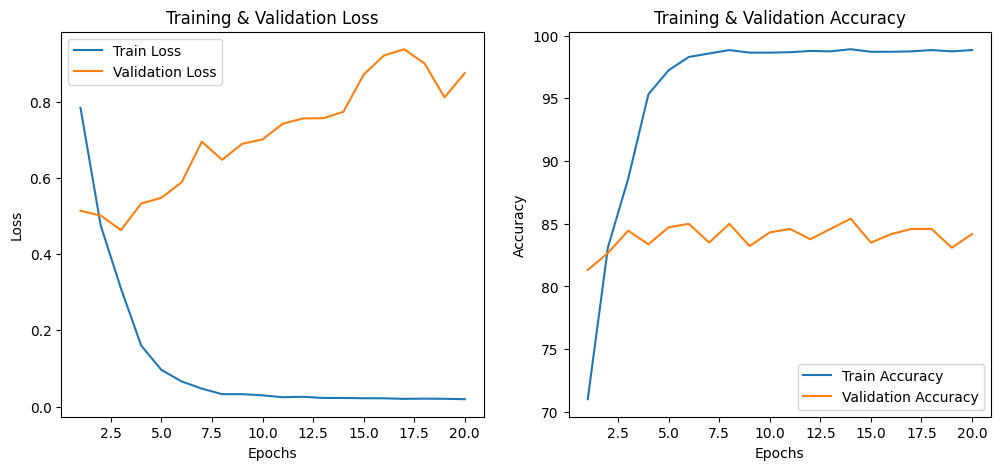

In [ ]:
# Plot Loss and Accuracy
epochs = range(1, 21)
plt.figure(figsize=(12, 5))

# Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, label='Train Accuracy')
plt.plot(epochs, val_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()
